## Chapter 10 Problems - HWK 3

## Functions

In [2]:
import math
import pandas as pd
from datetime import datetime

In [2]:
# Delta
def calc_delta(t, k, u, d, s, δ, call) -> float:
    
    if call:
        cu = (s * u) - k
        cd = (s * d ) - k
        if cd < 0:
            cd = 0
    else:
        # logic for a put option
        cu = k - (s * u)
        cd = k - (s * d)
        if cu < 0:
            cu = 0
        
    delta = (math.e ** (-δ * (t))) * ((cu - cd)/(s * (u - d)))
    return delta

# B
def calculate_b(r, k, s, u, d, t, call) -> float:
    
    if call:
        cu = (s * u) - k
        cd = (s * d ) - k
        if cd < 0:
            cd = 0
    else:
        # logic for a put option
        cu = k - (s * u)
        cd = k - (s * d)
        if cu < 0:
            cu = 0
        
    b = (math.e ** (-r * t)) * ((u * cd - d * cu) / (u - d))
    
    return(b)

# Premium
def calculate_premium(s, delta, b):
    premium = (delta * s) + b
    return premium


# Price Function
def price(t,k,u,d,s,r,call=True):
        
    delta = calc_delta(t,k,u,d,s,δ,call)
    print(delta)
    
    b = calculate_b(r, k, s, u, d, t, call)
    print(b)

    prem = calculate_premium(s, delta, b)
    print(prem)
    
    return(prem)

### 10.1

### a. 

In [3]:
# Assumptions
s = 100
k = 105
r = 0.08
t = 0.5
δ = 0.0 
u = 1.3
d = 0.8
n = 1.0

In [4]:
delta = calc_delta(t,k,u,d,s,δ,call=True)
print(delta)

0.5


In [5]:
b = calculate_b(r, k, s, u, d, t,call=True)
print(b)

-38.431577566092926


In [6]:
calculate_premium(s, delta, b)

11.568422433907074

In [7]:
price(t,k,u,d,s,r,call=True)

0.5
-38.431577566092926
11.568422433907074


11.568422433907074

### b.

In [8]:
# Assumptions
s = 100
k = 105
r = 0.08
t = 0.5
δ = 0.0 
u = 1.3
d = 0.8
n = 1.0

In [9]:
delta = calc_delta(t,k,u,d,s,δ,call=False)
print(delta)

b = calculate_b(r, k, s, u, d, t, call=False)
print(b)

calculate_premium(s, delta, b)

-0.5
62.451313544901005


12.451313544901005

## 10.2

### a.

In [10]:
# Assumptions
s = 100
k = 95
r = 0.08
t = 0.5
δ = 0
u = 1.3
d = 0.8
n = 1

In [11]:
price(t, k, u, d, s, r, call=True)

0.7
-53.804208592530095
16.195791407469905


16.195791407469905

### b. and c.

How to arbitrage if price is 17?  15.5?

If we observe a price of 17 dollars, then we would sell the option and purchase the replicating portfolio. This means that we would purchase 0.7 shares of the stock and borrow 53.804 dollars at the risk free rate.

If we observe a price of 15.5 dollars then we would buy the option as it is undervalued. To hedge the risk that the option is worthless at expiry we will sell short 0.7 shares of the stock and lend 53.804 dollars at the risk free rate.

## 10.3

### a.

In [12]:
# Assumptions
s = 100
k = 95
r = 0.08
t = 0.5
δ = 0
u = 1.3
d = 0.8
n = 1

In [13]:
price(t, k, u, d, s, r, call=False)

-0.3
37.470788126940604
7.4707881269406045


7.4707881269406045

### b. and c.

How to arbitrage if the price is 8? 6?

If we observe a price of 8 dollars then we would sell the option and purchase the replicating portfolio by selling short 0.3 shares and borrowing 37.37 at the risk free rate.

If we observe a price of 6 dollars then we would buy the option, and as a hedge purchase the replicating portfolio of 0.3 shares and lend 37.47 dollars.

## 10.4

In [11]:
# calculate volatility

def volatility(data):
    # data should be passed in the default format exported by yahoo finance
    # will only work to calculate annual volatility
    
    if 'Year' in data.columns:
        pass
    else:
        data['Year'] = [datetime.strptime(i, '%Y-%m-%d').year for i in data.Date]
    
    data['LaggedClose'] = data['Adj Close'].shift(1)
    data['ContCompoundReturn'] = [math.log(data['Adj Close'][i] / data.LaggedClose[i]) for i in range(len(data.Date))]
    
    time_period_volatility = data.ContCompoundReturn.std()
    
    # calculate volatility for each year
    groups = data.groupby('Year').std().ContCompoundReturn
    volatility = [i * math.sqrt(52) for i in groups]
    
    years = data.Year.unique()
    results = pd.DataFrame({"Year":years, "Volatility":volatility})
    
    return (time_period_volatility, results)

In [12]:
aapl_data = pd.read_csv('AAPL.csv')

aapl_volatility = volatility(aapl_data)

print(f"volatility in the full sample was {aapl_volatility[0]}")

aapl_volatility[1]

volatility in the full sample was 0.019009891400280622


,Year,Volatility
0,2015,0.110022
1,2016,0.106171
2,2017,0.079623
3,2018,0.130710
4,2019,0.119456
5,2020,0.219005


### 10.4

In [13]:
# having some issues with this function

def split_year_volatility(data):
    data['Year'] = [datetime.strptime(i, '%Y-%m-%d').year for i in data.Date]
    data['Month'] = [datetime.strptime(i, '%Y-%m-%d').month for i in data.Date]
    
    first_half_results, second_half_results = [], []
    
    years = data.Year.unique()

    for year in years:
        current_data = data[data.Year == year]
        first_half = current_data[data.Month < 7].reset_index()
        second_half = current_data[data.Month >= 7].reset_index()
                
        first_half_volatility, second_half_volatility = volatility(first_half)[0], volatility(second_half)[0]
        first_half_results.append(first_half_volatility)
        second_half_results.append(second_half_volatility)
        
    final_results = pd.DataFrame({'Year':years, 'FirstHalf':first_half_results, 'SecondHalf':second_half_results})

    return final_results

In [14]:
# Annual volatility full dataset and by year
aapl_data = pd.read_csv('AAPL.csv')
aapl_volatility = volatility(aapl_data)

wmt_data = pd.read_csv('WMT.csv')
wmt_volatility = volatility(wmt_data)

spy_data = pd.read_csv('SPY.csv')
spy_volatility = volatility(spy_data)

usd_data = pd.read_csv('USD.csv')
usd_volatility = volatility(usd_data)

assets = ['AAPL', 'WMT', 'SPY', 'USD']

volatilities = [aapl_volatility[0], wmt_volatility[0], spy_volatility[0], usd_volatility[0]]

results = pd.DataFrame({"Asset":assets, "Volatility":volatilities})
print(results)

# Annual volatility for first half and second half of each year

print(split_year_volatility(aapl_data))
print(split_year_volatility(wmt_data))
print(split_year_volatility(spy_data))
print(split_year_volatility(usd_data))




  Asset  Volatility
0  AAPL    0.019010
1   WMT    0.013957
2   SPY    0.012023
3   USD    0.004109
   Year  FirstHalf  SecondHalf
0  2015        NaN    0.015257
1  2016   0.017110    0.012024
2  2017   0.010766    0.011424
3  2018   0.015179    0.020695
4  2019   0.018750    0.014272
5  2020   0.033593    0.026430


C:\Users\misaa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\misaa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\misaa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\misaa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\misaa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\misaa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: Us

   Year  FirstHalf  SecondHalf
0  2015        NaN    0.010939
1  2016   0.014307    0.009339
2  2017   0.009548    0.012775
3  2018   0.016119    0.014197
4  2019   0.008594    0.009490
5  2020   0.024187    0.015173
   Year  FirstHalf  SecondHalf
0  2015        NaN    0.011472
1  2016   0.010152    0.005756
2  2017   0.004464    0.004028
3  2018   0.010459    0.011142
4  2019   0.007975    0.007862
5  2020   0.028420    0.011183
   Year  FirstHalf  SecondHalf
0  2015        NaN    0.008212
1  2016   0.005248    0.004104
2  2017   0.003944    0.003597
3  2018   0.004002    0.003773
4  2019   0.002984    0.002663
5  2020   0.005354    0.003316


C:\Users\misaa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\misaa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\misaa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\misaa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\misaa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\misaa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: Us

### 10.5

In [15]:
AAPL_data = pd.read_csv('AAPL.csv')
WMT_data = pd.read_csv('WMT.csv')
SPY_data = pd.read_csv('SPY.csv')
USD_data = pd.read_csv('USD.csv')

In [33]:
AAPL_volatility = volatility(AAPL_data)[1]
WMT_volatility = volatility(WMT_data)[1]
SPY_volatility = volatility(SPY_data)[1]
USD_volatility = volatility(USD_data)[1]

In [44]:
data = pd.merge(AAPL_volatility, WMT_volatility, on='Year')
data = data.rename(columns = {"Year":"Year", "Volatility_x":"AAPL_vol", "Volatility_y":"WMT_vol"})
data = pd.merge(data, SPY_volatility, on='Year')
data = pd.merge(data, USD_volatility, on='Year')
data = data.rename(columns = {"Volatility_x":"SPY_vol", "Volatility_y":"USD_vol"})

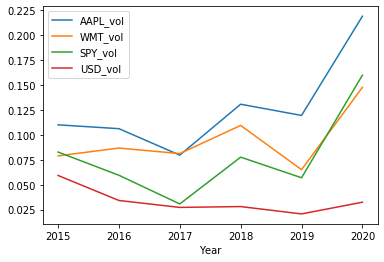

In [50]:
data.plot.line(x='Year', y=['AAPL_vol', 'WMT_vol', 'SPY_vol', 'USD_vol'])

Volatility in equities definitely moves in tandem!